In [1]:
import sys
import os

# Add utils to the path
sys.path.insert(0, os.getcwd() + '\\utils\\')

import SIDERParser as SIDER
from matplotlib import pyplot as plt

In [2]:
mysider = SIDER.SIDERParser()
sider_all_se = mysider.parser_meddra_all_se('PT')
sider_1 = mysider.parser_meddra_freq('PT')
sider_2 = mysider.se_freq_breakdown(sider_1)
sider_3 = mysider.VennCounterFreqType(sider_2)
sider_4, sider_placebo = mysider.preprocessingToFrequencyLabels(sider_2)
sider_5 = mysider.UnifySets(sider_4)
sider_6, counter_1 = mysider.removepairsInconsistencyFrequency(sider_5)

# Important variables
sider_with_freq, unique_se_with_freq = mysider.finalDrugSElist(sider_6)
sider_pmktg = mysider.UnifySetsPostmarketing(sider_4, unique_se_with_freq)
sider_no_freq = mysider.SideEffectswithNoFrequency(sider_all_se, sider_with_freq,
                                                  sider_pmktg,unique_se_with_freq )
sider_ind = mysider.parser_all_indications('PT')

#print 'Rating counter\n', counter_1
print 'Number of final drugs with frequency', len(sider_with_freq)
print 'Number of unique side-effects (with freq.)', len(unique_se_with_freq)
print 'Number of drugs with post-marketing se', len(sider_pmktg)
print 'Number of drugs with unknown frequency', len(sider_no_freq)
print 'Number of drugs with text mention indication', len(sider_ind)

Number of final drugs with frequency 963
Number of unique side-effects (with freq.) 2471
Number of drugs with post-marketing se 618
Number of drugs with unknown frequency 954
Number of drugs with text mention indication 1004


<Figure size 720x1080 with 0 Axes>

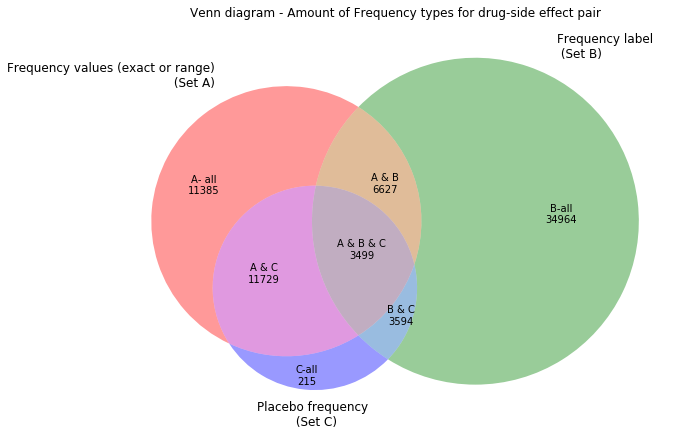

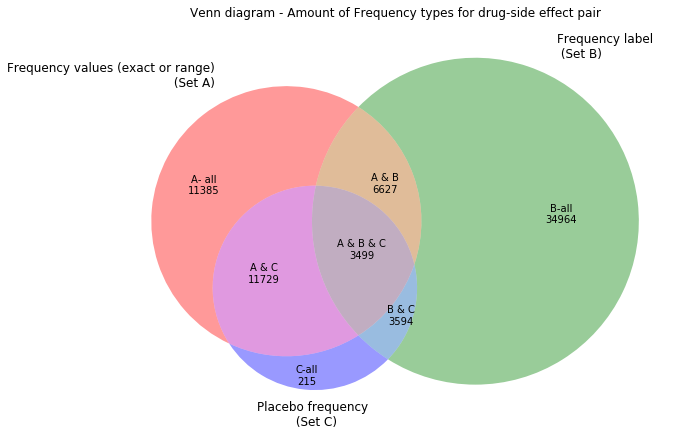

In [3]:
plt.figure(figsize=(10,15))
mysider.plotVennDiagramFreqType(sider_3, '')